In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Lambda, Conv2D, BatchNormalization, Flatten, Activation, MaxPooling2D, Dense
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.initializers import glorot_uniform
import matplotlib.pyplot as plt

In [40]:
def CNN_lv2(input_shape=(28,28,1,)):
    x_input=Input(input_shape)
    
    x=Conv2D(6,(5,5), strides=(1,1), padding='valid', name='conv1', kernel_initializer=glorot_uniform(seed=0))(x_input)
    x=BatchNormalization(axis=3, name='bn_conv1')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)
    
    x=Conv2D(32, (5,5), strides=(1,1), padding='valid', name='conv2', kernel_initializer=glorot_uniform(seed=0))(x)
    x=BatchNormalization(axis=3, name='bn_conv2')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)
    
    x=Flatten()(x)
    x=Dense(10, activation='softmax', name='fc', kernel_initializer=glorot_uniform(seed=0))(x)
    
    model=Model(inputs=x_input, outputs=x, name='CNN_lv2')
    return model

In [49]:
def CNN_lv3(input_shape=(28,28,1,)):
    x_input=Input(input_shape)
    
    x=Conv2D(6,(5,5), strides=(1,1), padding='valid', name='conv1', kernel_initializer=glorot_uniform(seed=0))(x_input)
    x=BatchNormalization(axis=3, name='bn_conv1')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)
    
    x=Conv2D(32, (5,5), strides=(1,1), padding='valid', name='conv2', kernel_initializer=glorot_uniform(seed=0))(x)
    x=BatchNormalization(axis=3, name='bn_conv2')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)
 
    x=Conv2D(64, (5,5), strides=(1,1), padding='valid', name='conv3', kernel_initializer=glorot_uniform(seed=0))(x)
    x=BatchNormalization(axis=3, name='bn_conv3')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)

    x=Flatten()(x)
    x=Dense(10, activation='softmax', name='fc', kernel_initializer=glorot_uniform(seed=0))(x)
    
    model=Model(inputs=x_input, outputs=x, name='CNN_lv2')
    return model

In [55]:
def CNN_lv3_2(input_shape=(28,28,1,)):
    x_input=Input(input_shape)
    
    x=Conv2D(12,(5,5), strides=(1,1), padding='valid', name='conv1', kernel_initializer=glorot_uniform(seed=0))(x_input)
    x=BatchNormalization(axis=3, name='bn_conv1')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)
    
    x=Conv2D(32, (5,5), strides=(1,1), padding='valid', name='conv2', kernel_initializer=glorot_uniform(seed=0))(x)
    x=BatchNormalization(axis=3, name='bn_conv2')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)
 
    x=Conv2D(64, (5,5), strides=(1,1), padding='valid', name='conv3', kernel_initializer=glorot_uniform(seed=0))(x)
    x=BatchNormalization(axis=3, name='bn_conv3')(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3), strides=(1,1))(x)

    x=Flatten()(x)
    x=Dense(10, activation='softmax', name='fc', kernel_initializer=glorot_uniform(seed=0))(x)
    
    model=Model(inputs=x_input, outputs=x, name='CNN_lv2')
    return model

In [28]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
y_train=train['label']
x_train=train.drop(['label'], axis=1)

x_train=np.array(x_train.values)
x_train=np.array([i.reshape(28,28,1) for i in x_train])
y_train=y_train.values #already numnp obj
x_test=np.array(test.values)
x_test=np.array([i.reshape(28,28,1) for i in x_test])
                 
y_train_mod=np.array([[0,0,0,0,0,0,0,0,0,0]])

for i in y_train:
    tmp=np.array([[0,0,0,0,0,0,0,0,0,0]])
    tmp[0][i]=1
    y_train_mod=np.append(y_train_mod, tmp, axis=0)

y_train_mod=np.delete(y_train_mod, 0,0)

y_train_mod

x_val=x_train[40000:]
y_val=y_train_mod[40000:]
x_train=x_train[:40000]
y_train=y_train_mod[:40000]

In [29]:
y_train_mod[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

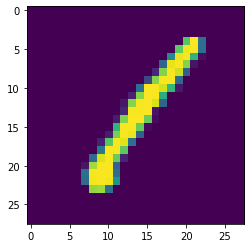

In [30]:
plt.imshow(x_train[0].reshape(28,28))

In [41]:
model=CNN_lv2()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "CNN_lv2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 6)         156       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 24, 24, 6)         24        
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 18, 18, 32)        4832      
_________________________________________________________________
bn_conv2 (BatchNormalization (None, 18, 18, 32)        128 

In [50]:
model2=CNN_lv3()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "CNN_lv2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 6)         156       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 24, 24, 6)         24        
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 18, 18, 32)        4832      
_________________________________________________________________
bn_conv2 (BatchNormalization (None, 18, 18, 32)        128 

In [56]:
model3=CNN_lv3_2()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "CNN_lv2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 12)        312       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 24, 24, 12)        48        
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 12)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 12)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 18, 18, 32)        9632      
_________________________________________________________________
bn_conv2 (BatchNormalization (None, 18, 18, 32)        128 

In [42]:
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 2000 samples
Epoch 1/15
40000/40000 [==============================] - 25s 631us/sample - loss: 0.2175 - accuracy: 0.9419 - val_loss: 0.1107 - val_accuracy: 0.9725
Epoch 2/15
40000/40000 [==============================] - 25s 613us/sample - loss: 0.0908 - accuracy: 0.9755 - val_loss: 0.1305 - val_accuracy: 0.9670
Epoch 3/15
40000/40000 [==============================] - 24s 603us/sample - loss: 0.0686 - accuracy: 0.9812 - val_loss: 0.2062 - val_accuracy: 0.9425
Epoch 4/15
40000/40000 [==============================] - 24s 605us/sample - loss: 0.0536 - accuracy: 0.9846 - val_loss: 0.0784 - val_accuracy: 0.9775
Epoch 5/15
40000/40000 [==============================] - 24s 599us/sample - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.0991 - val_accuracy: 0.9750
Epoch 6/15
40000/40000 [==============================] - 24s 599us/sample - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0825 - val_accuracy: 0.9770
Epoch 7/15
40000/40000 [=====================

In [51]:
model2.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 2000 samples
Epoch 1/15
40000/40000 [==============================] - 48s 1ms/sample - loss: 0.1755 - accuracy: 0.9495 - val_loss: 0.2502 - val_accuracy: 0.9375
Epoch 2/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.0878 - accuracy: 0.9756 - val_loss: 0.1028 - val_accuracy: 0.9730
Epoch 3/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.0630 - accuracy: 0.9826 - val_loss: 0.2026 - val_accuracy: 0.9460
Epoch 4/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.0497 - accuracy: 0.9866 - val_loss: 0.0933 - val_accuracy: 0.9760
Epoch 5/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.0466 - accuracy: 0.9875 - val_loss: 0.0944 - val_accuracy: 0.9735
Epoch 6/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.1009 - val_accuracy: 0.9795
Epoch 7/15
40000/40000 [==============================] -

In [57]:
model3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 2000 samples
Epoch 1/10
40000/40000 [==============================] - 54s 1ms/sample - loss: 0.1551 - accuracy: 0.9549 - val_loss: 0.1393 - val_accuracy: 0.9670
Epoch 2/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 0.0800 - accuracy: 0.9780 - val_loss: 0.0748 - val_accuracy: 0.9830
Epoch 3/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 0.0577 - accuracy: 0.9847 - val_loss: 0.0667 - val_accuracy: 0.9795
Epoch 4/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 0.0529 - accuracy: 0.9857 - val_loss: 0.0950 - val_accuracy: 0.9800
Epoch 5/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 0.0428 - accuracy: 0.9882 - val_loss: 0.1805 - val_accuracy: 0.9460
Epoch 6/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 0.0360 - accuracy: 0.9898 - val_loss: 0.0465 - val_accuracy: 0.9895
Epoch 7/10
40000/40000 [==============================] -

In [43]:
prediction=model.predict(x_test.astype(float))

In [44]:
prediction[0]

array([1.2150906e-11, 1.4869506e-17, 1.0000000e+00, 1.2496015e-10,
       5.3824264e-16, 4.2247170e-15, 8.5330716e-19, 3.3897047e-12,
       1.9689440e-16, 8.9077703e-15], dtype=float32)

In [46]:
pd.DataFrame(prediction).to_csv('200130_submission.csv', index=False)

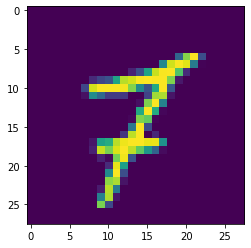

In [65]:
plt.imshow(x_test[49].reshape(28,28))

In [53]:
prediction2=model2.predict(x_test.astype(float))
pd.DataFrame(prediction2).to_csv('200130_submission_2.csv', index=False)

In [58]:
prediction3=model3.predict(x_test.astype(float))
pd.DataFrame(prediction3).to_csv('200130_submission_3.csv', index=False)

In [59]:
model_json=model.to_json()
with open("200130_model.json", "w") as json_file:
    json_file.write(model_json)

model_json=model2.to_json()
with open("200130_model2.json", "w") as json_file:
    json_file.write(model_json)

model_json=model3.to_json()
with open("200130_model3.json", "w") as json_file:
    json_file.write(model_json)

In [60]:
model.save_weights("200130_model.h5")
model2.save_weights("200130_model2.h5")
model3.save_weights("200130_model3.h5")